----- Πρώτες γραμμές δεδομένων -----
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Accuracy: 0.9333333333333333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



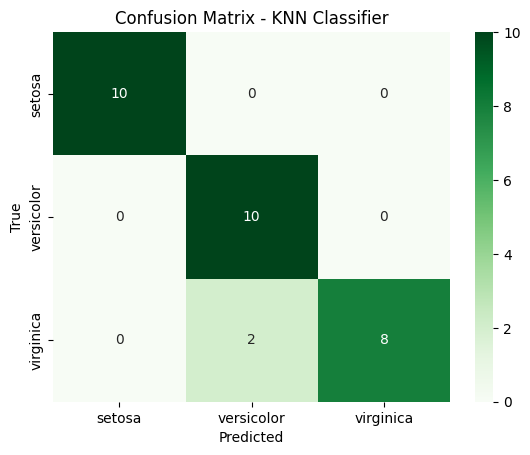

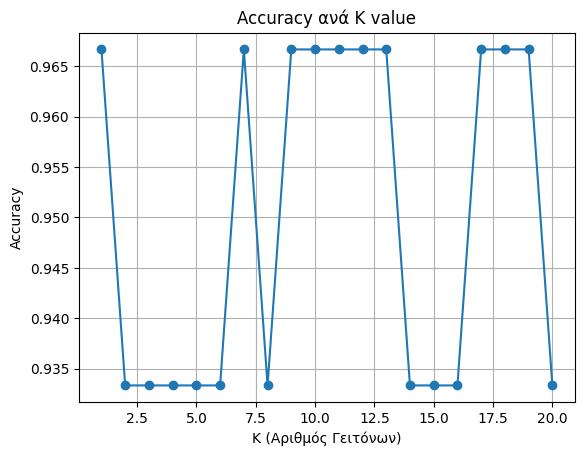

In [1]:
# Day 10 - K-Nearest Neighbors (KNN) Classifier (Iris Dataset)

# 1. Εισαγωγή βιβλιοθηκών
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Φόρτωση dataset
df = sns.load_dataset("iris")
print("----- Πρώτες γραμμές δεδομένων -----")
print(df.head())

# 3. Ορισμός χαρακτηριστικών (X) και στόχου (y)
X = df.drop(columns=["species"])
y = df["species"]

# 4. Κανονικοποίηση δεδομένων (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split σε train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 6. Δημιουργία & εκπαίδευση KNN μοντέλου
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 7. Προβλέψεις
y_pred = knn.predict(X_test)

# 8. Αξιολόγηση
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=df["species"].unique(),
            yticklabels=df["species"].unique())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - KNN Classifier")
plt.show()

# 10. Έλεγχος απόδοσης για διαφορετικά K
k_values = range(1, 21)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_k))

plt.plot(k_values, accuracies, marker="o")
plt.title("Accuracy ανά K value")
plt.xlabel("K (Αριθμός Γειτόνων)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
